<a href="https://colab.research.google.com/github/SiddharthSinghKushwaha/CDS605_ML_TheoryToCode/blob/main/Mobile_Dataset_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project 100 points

    Problem 7: Analyse and built relation between features of a mobile phone
    (eg:- RAM, Internal Memory etc) and its selling price range.
  
  [Dataset Link](https://docs.google.com/spreadsheets/d/1BiONFFp7rm3VGlAfzWVzsQcaVaIbiHYJlRsPohW2BP0/edit?gid=1427974177#gid=1427974177)

  > Presentation Date: 18-11-2025

  [Presentation Link](https://docs.google.com/presentation/d/1JFhFJ_N5eo_6em4hWEwNo7Rhw0FBWpEWzVMQpLWZZBE/edit?usp=sharing)

## Import libraries

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report

## STEP 1 & 2: Load Dataset & Preprocessing

In [ ]:
# load the dataset mobile_dataset.xlsx
df = pd.read_excel('Data.xlsx')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# number of rows and columns
print("Shape of the dataset", df.shape)
# name of columns
print("Columns of the dataset", df.columns)

Shape of the dataset (2000, 21)
Columns of the dataset Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [ ]:
# to check is there is any missing value of not
print("Missing values of the dataset", df.isnull().sum())

Missing values of the dataset battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


Multiclass Classification Problem of 4 classes
price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


/tmp/ipython-input-516542414.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=noc.index, y=noc.values, palette='viridis')


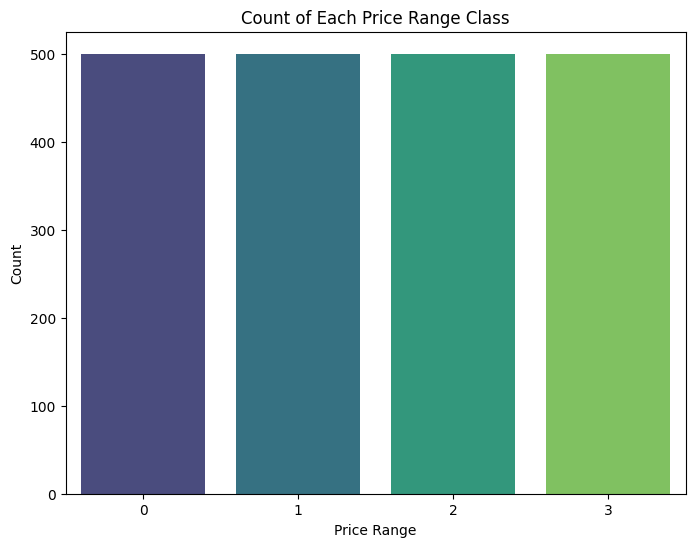

In [ ]:
# to determine number of classes
noc = df['price_range'].value_counts()    # noc - number of classes
if len(noc) > 2:
  print(f"Multiclass Classification Problem of {len(noc)} classes")
else:
  print("Binary Classification Problem of 2 classes")

# print class label and its count
print(noc)

plt.figure(figsize=(8, 6))
sns.barplot(x=noc.index, y=noc.values, palette='viridis')
plt.title('Count of Each Price Range Class')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

The dataset is perfectly balanced, no missing values and of multi-class nature with 2000 rows and 21 columns.

### Correlation Matrix

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998


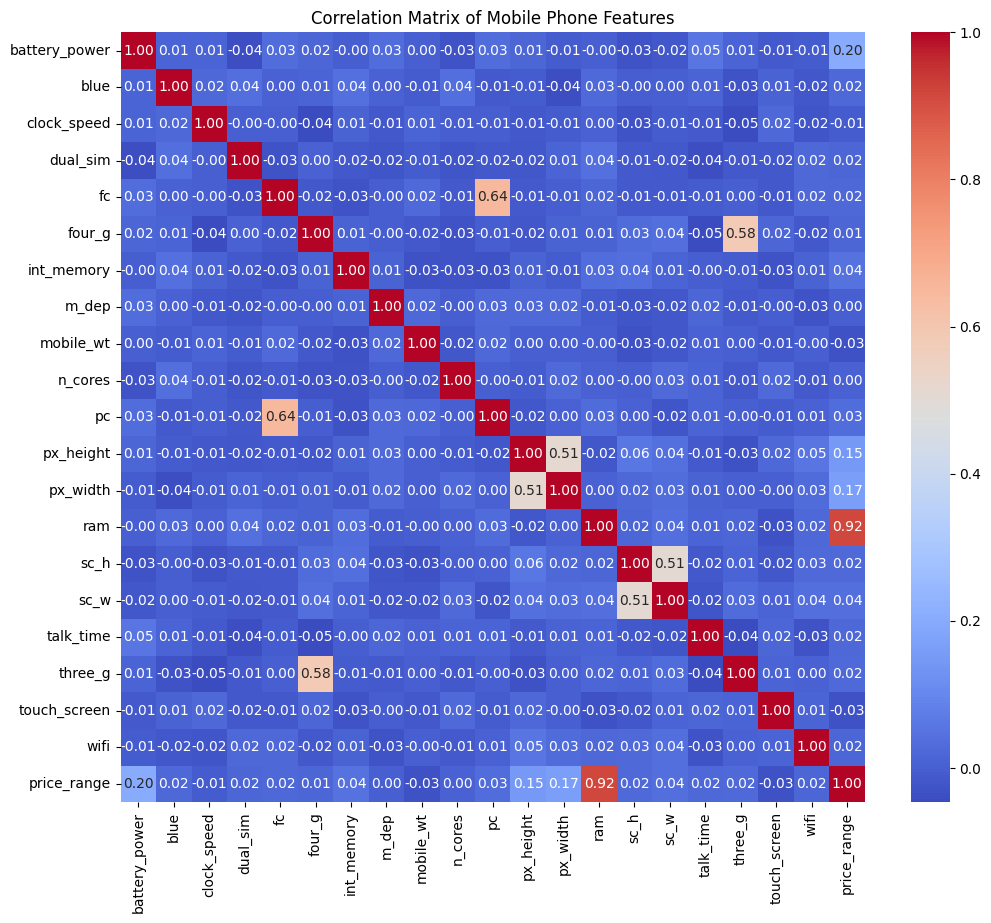

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
display(correlation_matrix.head())

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap= 'coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Mobile Phone Features')
plt.show()

### Variance

In [ ]:
# calculate the variance of the dataset and represent in three decimal format
variance = df.var()
print(variance.round(3))

battery_power     193088.360
blue                   0.250
clock_speed            0.666
dual_sim               0.250
fc                    18.848
four_g                 0.250
int_memory           329.267
m_dep                  0.083
mobile_wt           1253.136
n_cores                5.234
pc                    36.776
px_height         196941.408
px_width          186796.362
ram              1176643.606
sc_h                  17.751
sc_w                  18.978
talk_time             29.855
three_g                0.182
touch_screen           0.250
wifi                   0.250
price_range            1.251
dtype: float64


In [ ]:
# Display features with highest variance
high_variance_features = variance.nlargest(10)
print("Top 5 Features with Highest Variance:\n", high_variance_features.round(3))

# Display features with lowest variance
low_variance_features = variance.nsmallest(10)
print("Top 5 Features with Lowest Variance:\n", low_variance_features.round(3))

Top 5 Features with Highest Variance:
 ram              1176643.606
px_height         196941.408
battery_power     193088.360
px_width          186796.362
mobile_wt           1253.136
int_memory           329.267
pc                    36.776
talk_time             29.855
sc_w                  18.978
fc                    18.848
dtype: float64
Top 5 Features with Lowest Variance:
 m_dep           0.083
three_g         0.182
four_g          0.250
dual_sim        0.250
wifi            0.250
blue            0.250
touch_screen    0.250
clock_speed     0.666
price_range     1.251
n_cores         5.234
dtype: float64


## STEP 3: Train-Test Split Dataset

In [ ]:
# split the dataset into independent X features and dependent y (price_range)
X = df.drop('price_range', axis=1)
y = df['price_range']

# Split the scaled data into training and testing sets (80-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (1600, 20)
Testing set shape: (400, 20)


## STEP 4: (A) Baseline (No Scaling)

In [ ]:
# Initialize the classification models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVC": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

accuracy_scores_without_scale = {}
time_scores_without_scale = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_without_scale[name] = accuracy
    time_scores_without_scale[name] = end_time - start_time

print("\n--- Model Accuracies ---")
for name, accuracy in accuracy_scores_without_scale.items():
    print(f"{name}: {accuracy:.4f}")

print("\n--- Model Training + Prediction Times ---")
for name, time_taken in time_scores_without_scale.items():
    print(f"{name}: {time_taken:.4f} seconds")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Model Accuracies ---
Logistic Regression: 0.6000
SVC: 0.9575
Decision Tree: 0.8300
Random Forest: 0.8800
KNN: 0.9350
Naive Bayes: 0.8100

--- Model Training + Prediction Times ---
Logistic Regression: 0.1359 seconds
SVC: 0.0894 seconds
Decision Tree: 0.0279 seconds
Random Forest: 0.5582 seconds
KNN: 0.0103 seconds
Naive Bayes: 0.0049 seconds


/tmp/ipython-input-1144708204.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies_series.index, y=accuracies_series.values, palette='viridis')


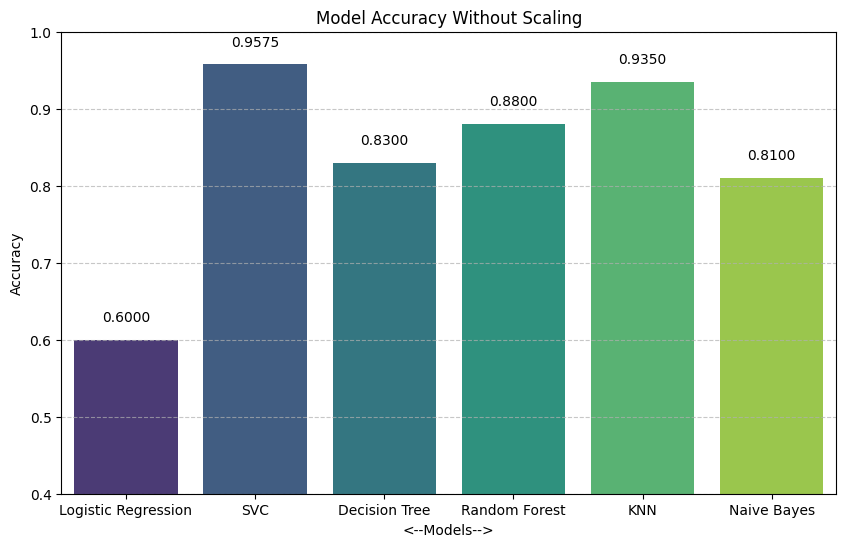

In [ ]:

accuracies_series = pd.Series(accuracy_scores_without_scale)

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies_series.index, y=accuracies_series.values, palette='viridis')
plt.title('Model Accuracy Without Scaling')
plt.xlabel('<--Models-->')
plt.ylabel('Accuracy')
plt.ylim(0.4, 1)
# Add accuracy values on top of the bars
for index, value in enumerate(accuracies_series.values):
    plt.text(index, value + 0.02, f'{value:.4f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## STEP 4: (B) Feature Selection

### Fisher Score

In [ ]:
# Calculate Fisher Score (F-statistic) for each feature
f_scores, p_values = f_classif(X_train, y_train)

# Create a pandas Series for better visualization and sorting
fisher_scores = pd.Series(f_scores, index=X.columns)

# Sort the features by their Fisher scores in descending order
sorted_fisher_scores = fisher_scores.sort_values(ascending=False)

print("Fisher Scores of Features (Higher score means more discriminative):\n")
display(sorted_fisher_scores)

Fisher Scores of Features (Higher score means more discriminative):



,0
ram,2832.557774
battery_power,25.685266
px_width,17.585980
px_height,11.916169
m_dep,3.654002
n_cores,2.951139
mobile_wt,2.878321
int_memory,2.400496
sc_h,2.115450
talk_time,1.598451


Top 4 important features: **RAM, battery_power, px_height and px_width**.

**5 Least** important features: clock_speed, bluetooth, 3G, dual_sim and wifi.

### Chi-Square Test

In [ ]:
# Calculate Chi-Square statistics and p-values
chi_scores, p_values_chi = chi2(X_train, y_train)

# Create a pandas Series for better visualization and sorting
chi_sq_features = pd.Series(chi_scores, index=X.columns)

# Sort the features by their Chi-Square scores in descending order
sorted_chi_sq_scores = chi_sq_features.sort_values(ascending=False)

# Optionally, you can also display the p-values
p_values_chi_series = pd.Series(p_values_chi, index=X.columns)
sorted_p_values_chi = p_values_chi_series.reindex(sorted_chi_sq_scores.index)
print("\nP-values for Chi-Square Test (Lower p-value indicates stronger significance):\n")
display(sorted_p_values_chi.round(5))


P-values for Chi-Square Test (Lower p-value indicates stronger significance):



,0
ram,0.00000
battery_power,0.00000
px_height,0.00000
px_width,0.00000
mobile_wt,0.00000
int_memory,0.00000
talk_time,0.00418
sc_w,0.00498
pc,0.01086
n_cores,0.01738


Top 4 important features are **RAM, px_width, px_height, and battery_power**.

**Least 5** important features: bluetooth, clock_speed, dual_sim, wifi and 3G.

` Based on the Fisher score and Chi-square test, least 5 important features can be removed from the dataset.`

In [ ]:
# Get the 5 least important features
least_5_features = sorted_p_values_chi.tail(5).index.tolist()

# Removing these features from the train and test sets
X_train_selected = X_train.drop(columns=least_5_features)
X_test_selected = X_test.drop(columns=least_5_features)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

accuracy_scores_reduced = {}
time_scores_reduced = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    end_time = time.time()
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_reduced[name] = accuracy
    time_scores_reduced[name] = end_time - start_time

print("\n--- Model Accuracies Feature Selection (Fisher & Chi-Square---")
for name, accuracy in accuracy_scores_reduced.items():
    print(f"{name}: {accuracy:.4f}")

print("\n--- Model Training + Prediction Times ---")
for name, time_taken in time_scores_reduced.items():
    print(f"{name}: {time_taken:.4f} seconds")


--- Model Accuracies Feature Selection (Fisher & Chi-Square---
Logistic Regression: 0.9725
SVC: 0.9100
Decision Tree: 0.8525
Random Forest: 0.8850
KNN: 0.5975
Naive Bayes: 0.8050

--- Model Training + Prediction Times ---
Logistic Regression: 0.0331 seconds
SVC: 0.1816 seconds
Decision Tree: 0.0162 seconds
Random Forest: 0.4902 seconds
KNN: 0.0250 seconds
Naive Bayes: 0.0025 seconds


/tmp/ipython-input-3845624667.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies_series.index, y=accuracies_series.values, palette='viridis')


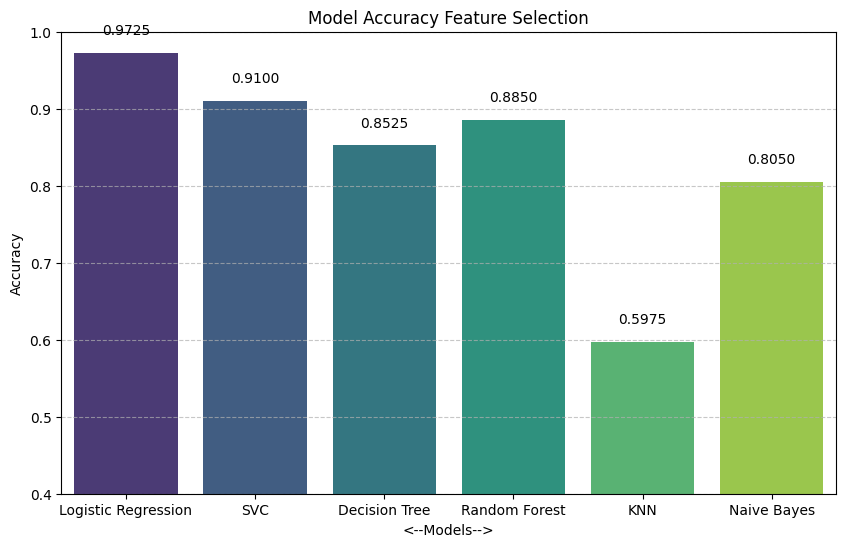

In [ ]:

accuracies_series = pd.Series(accuracy_scores_reduced)

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies_series.index, y=accuracies_series.values, palette='viridis')
plt.title('Model Accuracy Feature Selection')
plt.xlabel('<--Models-->')
plt.ylabel('Accuracy')
plt.ylim(0.4, 1)
# Add accuracy values on top of the bars
for index, value in enumerate(accuracies_series.values):
    plt.text(index, value + 0.02, f'{value:.4f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Wrapper

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

estimator = LogisticRegression(random_state=42)
rfe_selector = RFE(estimator=estimator, n_features_to_select=15)

rfe_selector.fit(X_train_scaled, y_train)

print(f"Number of features selected by RFE: {rfe_selector.n_features_}")

# Get the names of the selected features
selected_features_names = X.columns[rfe_selector.support_].tolist()
print(f"Selected features: {selected_features_names}")

# STEP 3: Transform train and test sets using RFE
X_train_rfe = rfe_selector.transform(X_train_scaled)
X_test_rfe = rfe_selector.transform(X_test_scaled)

accuracy_scores_rfe = {}
time_scores_rfe = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)
    end_time = time.time()
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_rfe[name] = accuracy
    time_scores_rfe[name] = end_time - start_time

print("\n--- Model Accuracies Feature Selection (Wrapper)")
for name, accuracy in accuracy_scores_rfe.items():
    print(f"{name}: {accuracy:.4f}")

print("\n--- Model Training + Prediction Times ---")
for name, time_taken in time_scores_rfe.items():
    print(f"{name}: {time_taken:.4f} seconds")

Number of features selected by RFE: 15
Selected features: ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'px_height', 'px_width', 'ram', 'sc_h', 'touch_screen', 'wifi']

--- Model Accuracies Feature Selection (Wrapper)
Logistic Regression: 0.9675
SVC: 0.8850
Decision Tree: 0.8525
Random Forest: 0.8925
KNN: 0.5225
Naive Bayes: 0.8050

--- Model Training + Prediction Times ---
Logistic Regression: 0.0166 seconds
SVC: 0.1856 seconds
Decision Tree: 0.0153 seconds
Random Forest: 0.4530 seconds
KNN: 0.0236 seconds
Naive Bayes: 0.0026 seconds


/tmp/ipython-input-2145315647.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies_series.index, y=accuracies_series.values, palette='viridis')


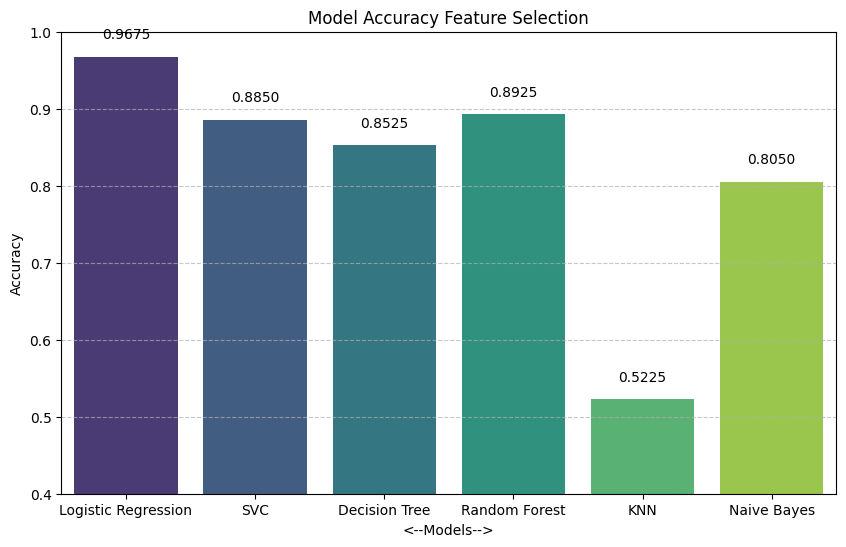

In [ ]:

accuracies_series = pd.Series(accuracy_scores_rfe)

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies_series.index, y=accuracies_series.values, palette='viridis')
plt.title('Model Accuracy Feature Selection')
plt.xlabel('<--Models-->')
plt.ylabel('Accuracy')
plt.ylim(0.4, 1)
# Add accuracy values on top of the bars
for index, value in enumerate(accuracies_series.values):
    plt.text(index, value + 0.02, f'{value:.4f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## STEP 4: (C) Feature Extraction

### PCA

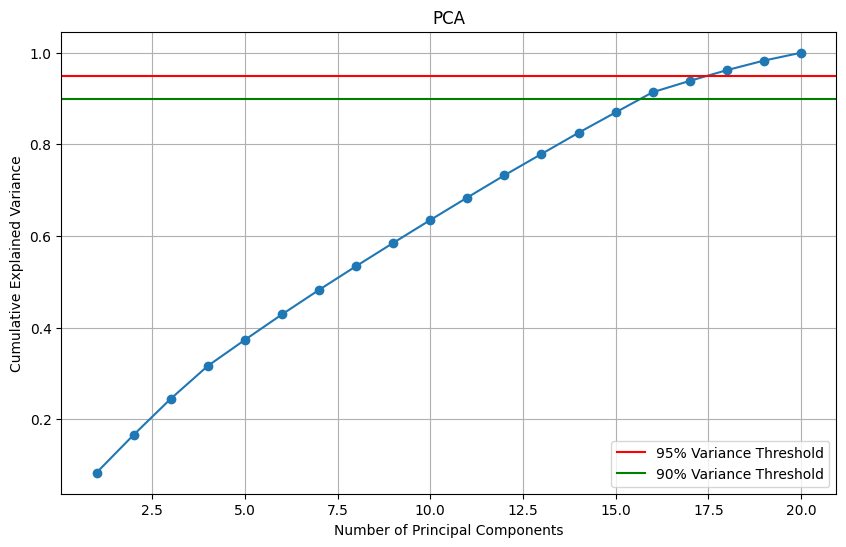

In [ ]:
# already X_train split and scaled in Wrapper section, no need to do again

# Fit PCA on training data only
pca = PCA()
pca.fit(X_train_scaled)

# Explained variance ratio
variance_ratio = pca.explained_variance_ratio_

# Cumulative variance
cumulative_variance = np.cumsum(variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_ratio) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance Threshold')
plt.axhline(y=0.90, color='g', linestyle='-', label='90% Variance Threshold')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA")
plt.legend()
plt.grid(True)
plt.show()

Lacks of proper Elbow sharp

In [ ]:
# Choosing 18 because its cumulative Explained variance crosses than 95%
n_components = 18

pca_final = PCA(n_components=n_components)

X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

accuracy_scores_pca = {}
time_scores_pca = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    end_time = time.time()
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_pca[name] = accuracy
    time_scores_pca[name] = end_time - start_time

print("\n--- Model Accuracies PCA (no. of components = 18)")
for name, accuracy in accuracy_scores_pca.items():
    print(f"{name}: {accuracy:.4f}")

print("\n--- Model Training + Prediction Times ---")
for name, time_taken in time_scores_pca.items():
    print(f"{name}: {time_taken:.4f} seconds")



--- Model Accuracies PCA (no. of components = 18)
Logistic Regression: 0.9575
SVC: 0.8800
Decision Tree: 0.5325
Random Forest: 0.6925
KNN: 0.5050
Naive Bayes: 0.7050

--- Model Training + Prediction Times ---
Logistic Regression: 0.0455 seconds
SVC: 0.1860 seconds
Decision Tree: 0.0460 seconds
Random Forest: 1.2626 seconds
KNN: 0.0106 seconds
Naive Bayes: 0.0033 seconds


/tmp/ipython-input-2608495228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies_series.index, y=accuracies_series.values, palette='viridis')


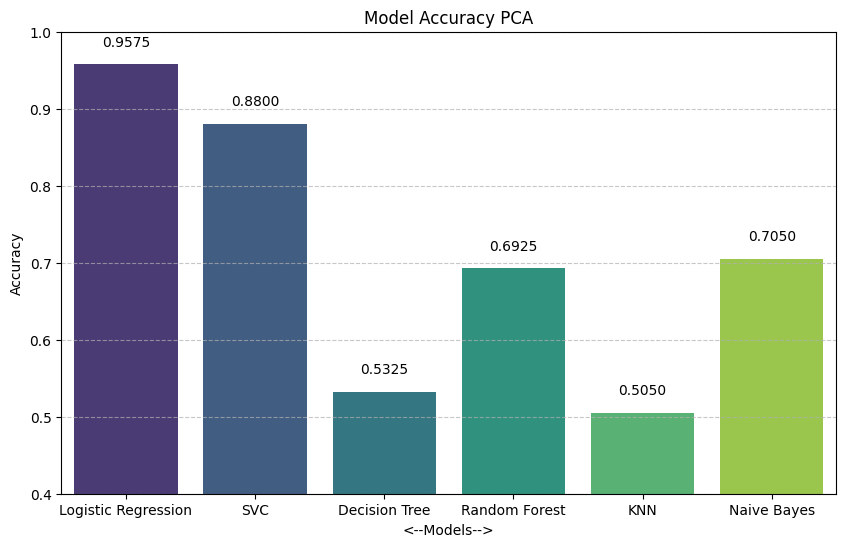

In [ ]:

accuracies_series = pd.Series(accuracy_scores_pca)

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies_series.index, y=accuracies_series.values, palette='viridis')
plt.title('Model Accuracy PCA')
plt.xlabel('<--Models-->')
plt.ylabel('Accuracy')
plt.ylim(0.4, 1)
# Add accuracy values on top of the bars
for index, value in enumerate(accuracies_series.values):
    plt.text(index, value + 0.02, f'{value:.4f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### LDA


Shape of LDA-transformed features (X_lda):
(1600, 3)

Explained variance ratio by each LDA component:
[0.996 0.003 0.001]


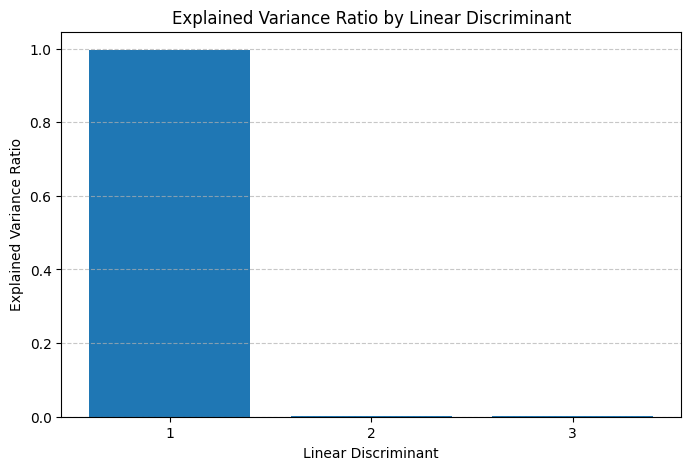

In [ ]:
# already we have X_train as scaled data from above Wrapper
n_components_lda = len(np.unique(y)) - 1
lda = LinearDiscriminantAnalysis(n_components=n_components_lda)
X_lda = lda.fit_transform(X_train_scaled, y_train)

print("\nShape of LDA-transformed features (X_lda):")
print(X_lda.shape)

# Explained variance ratio for LDA components
explained_variance_ratio_lda = lda.explained_variance_ratio_
print("\nExplained variance ratio by each LDA component:")
print(explained_variance_ratio_lda.round(3))

# Visualize the explained variance for LDA
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio_lda) + 1), explained_variance_ratio_lda)
plt.xlabel('Linear Discriminant')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Linear Discriminant')
plt.xticks(range(1, len(explained_variance_ratio_lda) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# LDA with 1 component
lda1 = LinearDiscriminantAnalysis(n_components=1)
X_train_lda1 = lda1.fit_transform(X_train_scaled, y_train)
X_test_lda1  = lda1.transform(X_test_scaled)

# LDA with 2 components
lda2 = LinearDiscriminantAnalysis(n_components=2)
X_train_lda2 = lda2.fit_transform(X_train_scaled, y_train)
X_test_lda2  = lda2.transform(X_test_scaled)

# LDA with 3 components (maximum allowed)
lda3 = LinearDiscriminantAnalysis(n_components=3)
X_train_lda3 = lda3.fit_transform(X_train_scaled, y_train)
X_test_lda3  = lda3.transform(X_test_scaled)


In [ ]:
def evaluate_models(X_train_new, X_test_new, y_train, y_test):
    accuracy_dict = {}
    time_dict = {}

    for name, model in models.items():
        start = time.time()
        model.fit(X_train_new, y_train)
        y_pred = model.predict(X_test_new)
        end = time.time()

        accuracy_dict[name] = accuracy_score(y_test, y_pred)
        time_dict[name] = end - start

    return accuracy_dict, time_dict

lda1_acc, lda1_time = evaluate_models(X_train_lda1, X_test_lda1, y_train, y_test)
lda2_acc, lda2_time = evaluate_models(X_train_lda2, X_test_lda2, y_train, y_test)
lda3_acc, lda3_time = evaluate_models(X_train_lda3, X_test_lda3, y_train, y_test)

print("\n=== LDA (1 Component) ===")
for name in models:
    print(f"{name}: Accuracy={lda1_acc[name]:.4f},  Time={lda1_time[name]:.4f} sec")

print("\n=== LDA (2 Components) ===")
for name in models:
    print(f"{name}: Accuracy={lda2_acc[name]:.4f},  Time={lda2_time[name]:.4f} sec")

print("\n=== LDA (3 Components) ===")
for name in models:
    print(f"{name}: Accuracy={lda3_acc[name]:.4f},  Time={lda3_time[name]:.4f} sec")


=== LDA (1 Component) ===
Logistic Regression: Accuracy=0.9600,  Time=0.1208 sec
SVC: Accuracy=0.9600,  Time=0.0647 sec
Decision Tree: Accuracy=0.9525,  Time=0.0101 sec
Random Forest: Accuracy=0.9525,  Time=0.4569 sec
KNN: Accuracy=0.9525,  Time=0.0050 sec
Naive Bayes: Accuracy=0.9625,  Time=0.0021 sec

=== LDA (2 Components) ===
Logistic Regression: Accuracy=0.9625,  Time=0.0350 sec
SVC: Accuracy=0.9575,  Time=0.0346 sec
Decision Tree: Accuracy=0.9325,  Time=0.0068 sec
Random Forest: Accuracy=0.9600,  Time=0.4832 sec
KNN: Accuracy=0.9550,  Time=0.0061 sec
Naive Bayes: Accuracy=0.9600,  Time=0.0028 sec

=== LDA (3 Components) ===
Logistic Regression: Accuracy=0.9575,  Time=0.0959 sec
SVC: Accuracy=0.9550,  Time=0.0541 sec
Decision Tree: Accuracy=0.9475,  Time=0.0088 sec
Random Forest: Accuracy=0.9600,  Time=0.3663 sec
KNN: Accuracy=0.9525,  Time=0.0046 sec
Naive Bayes: Accuracy=0.9650,  Time=0.0019 sec


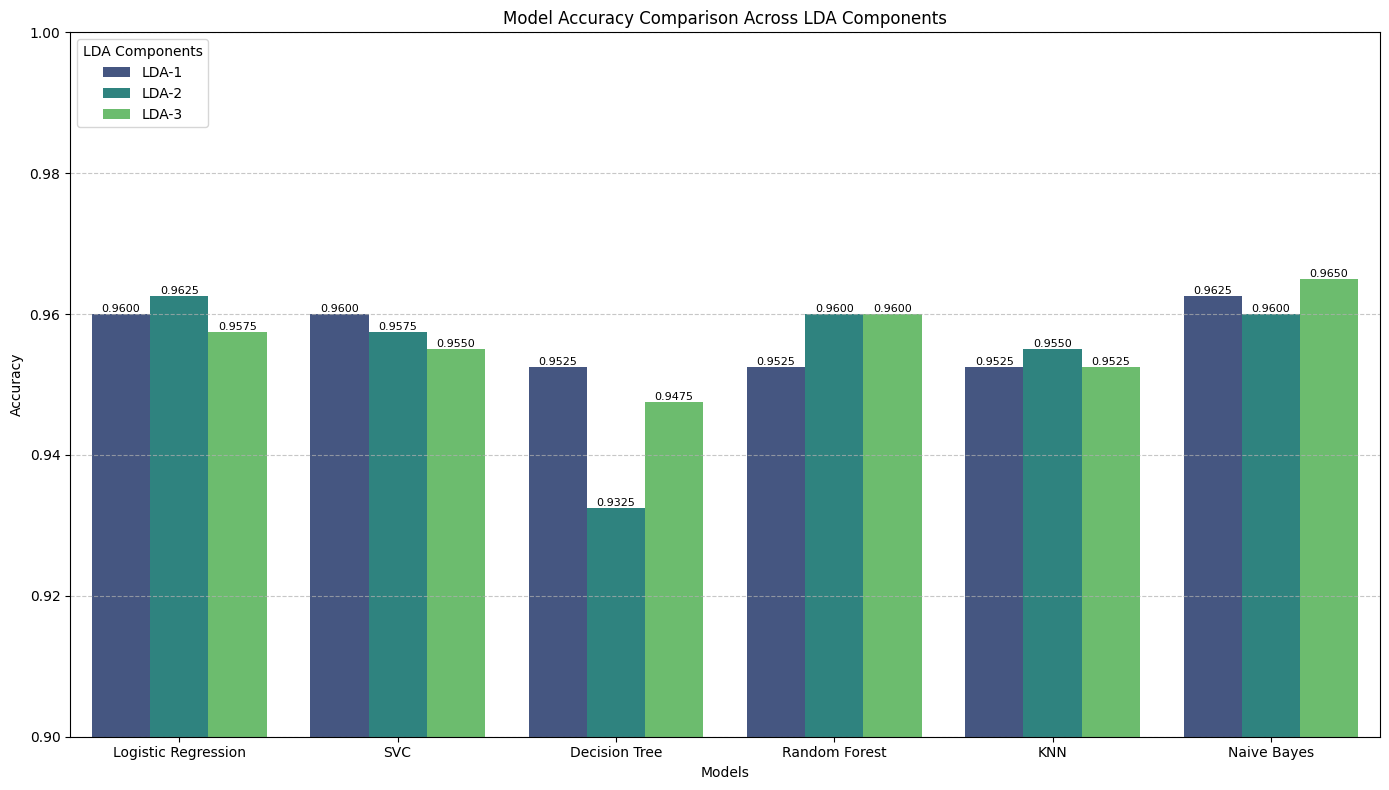

In [ ]:
# Combine LDA accuracies into a single dictionary
lda_accuracies = {
    "LDA-1": lda1_acc,
    "LDA-2": lda2_acc,
    "LDA-3": lda3_acc
}

# Convert to DataFrame for easier plotting
df_lda_accuracies = pd.DataFrame(lda_accuracies)

plt.figure(figsize=(14, 8))

# Plotting with melt to enable grouped bar plot
df_plot = df_lda_accuracies.reset_index().melt(id_vars='index', var_name='LDA Components', value_name='Accuracy')
sns.barplot(x='index', y='Accuracy', hue='LDA Components', data=df_plot, palette='viridis')

plt.title('Model Accuracy Comparison Across LDA Components')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)

# Add accuracy values on top of the bars
for container in plt.gca().containers:
    for patch in container.patches:
        plt.text(patch.get_x() + patch.get_width() / 2., patch.get_height(),
                 f'{patch.get_height():.4f}', ha='center', va='bottom', fontsize=8)

plt.legend(title='LDA Components', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Classification Report for Naive Bayes (LDA-3 Pipeline)

In [ ]:
nb_model_lda3 = GaussianNB()
nb_model_lda3.fit(X_train_lda3, y_train)
y_pred_nb_lda3 = nb_model_lda3.predict(X_test_lda3)

print(classification_report(y_test, y_pred_nb_lda3))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       100
           1       0.94      0.95      0.95       100
           2       0.96      0.94      0.95       100
           3       0.99      0.98      0.98       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



## STEP 5: Results

### Models accuracies comparision

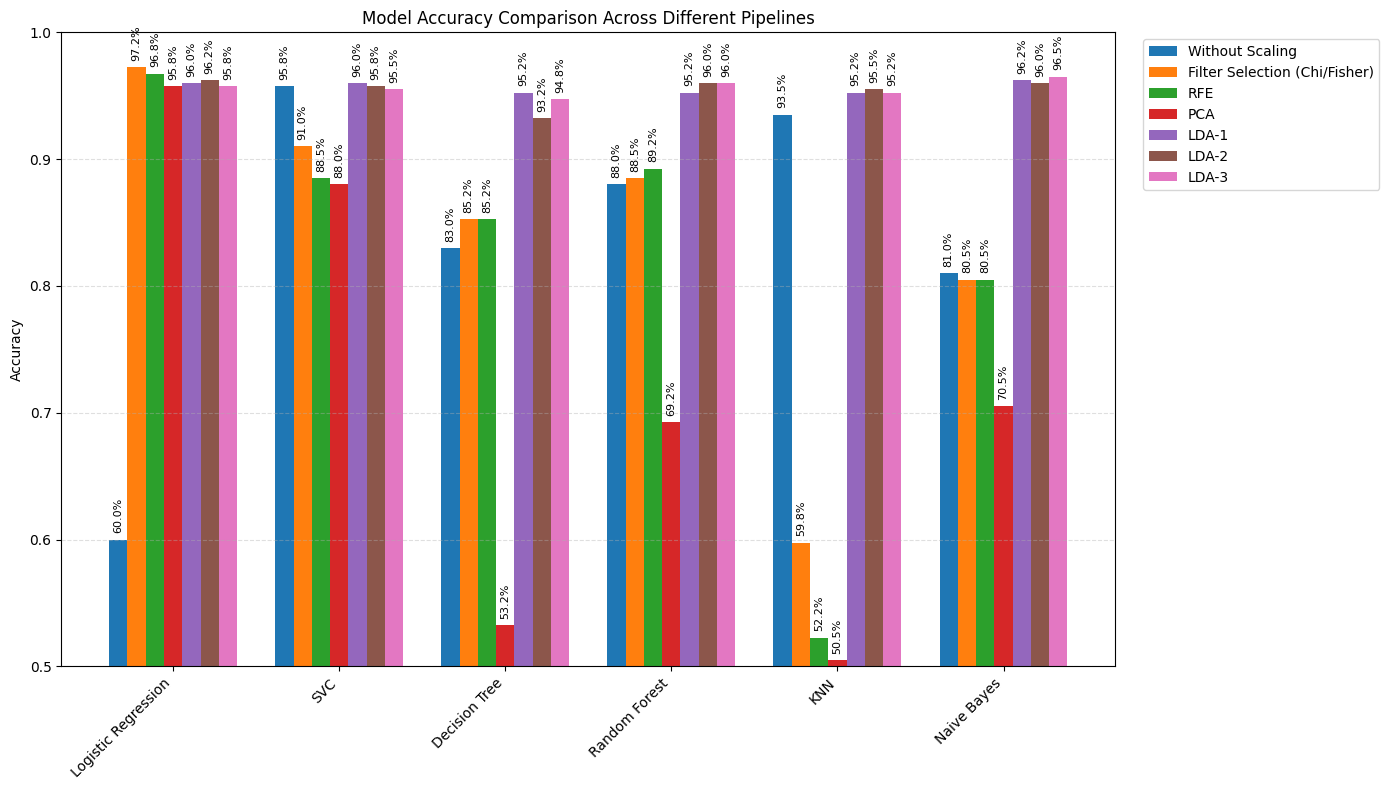

In [ ]:
accuracy_data = {
    "Without Scaling": accuracy_scores_without_scale,
    "Filter Selection (Chi/Fisher)": accuracy_scores_reduced,
    "RFE": accuracy_scores_rfe,
    "PCA": accuracy_scores_pca,
    "LDA-1": lda1_acc,
    "LDA-2": lda2_acc,
    "LDA-3": lda3_acc
}

df_acc = pd.DataFrame(accuracy_data)
plt.figure(figsize=(14, 8))

models = df_acc.index.tolist()
x = np.arange(len(models))
width = 0.11

# Create one bar per pipeline
for i, column in enumerate(df_acc.columns):
    plt.bar(x + i*width, df_acc[column], width, label=column)

    # Add percentage labels
    for xi, yi in zip(x + i*width, df_acc[column]):
        plt.text(xi, yi + 0.005, f"{yi*100:.1f}%", ha='center', va='bottom', fontsize=8, rotation=90)

plt.xticks(x + width*3, models, rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison Across Different Pipelines")
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0))
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.ylim(0.50, 1.0)
plt.tight_layout()
plt.show()


In [ ]:
print(df_acc)

                     Without Scaling  Filter Selection (Chi/Fisher)     RFE  \
Logistic Regression           0.6000                         0.9725  0.9675   
SVC                           0.9575                         0.9100  0.8850   
Decision Tree                 0.8300                         0.8525  0.8525   
Random Forest                 0.8800                         0.8850  0.8925   
KNN                           0.9350                         0.5975  0.5225   
Naive Bayes                   0.8100                         0.8050  0.8050   

                        PCA   LDA-1   LDA-2   LDA-3  
Logistic Regression  0.9575  0.9600  0.9625  0.9575  
SVC                  0.8800  0.9600  0.9575  0.9550  
Decision Tree        0.5325  0.9525  0.9325  0.9475  
Random Forest        0.6925  0.9525  0.9600  0.9600  
KNN                  0.5050  0.9525  0.9550  0.9525  
Naive Bayes          0.7050  0.9625  0.9600  0.9650  


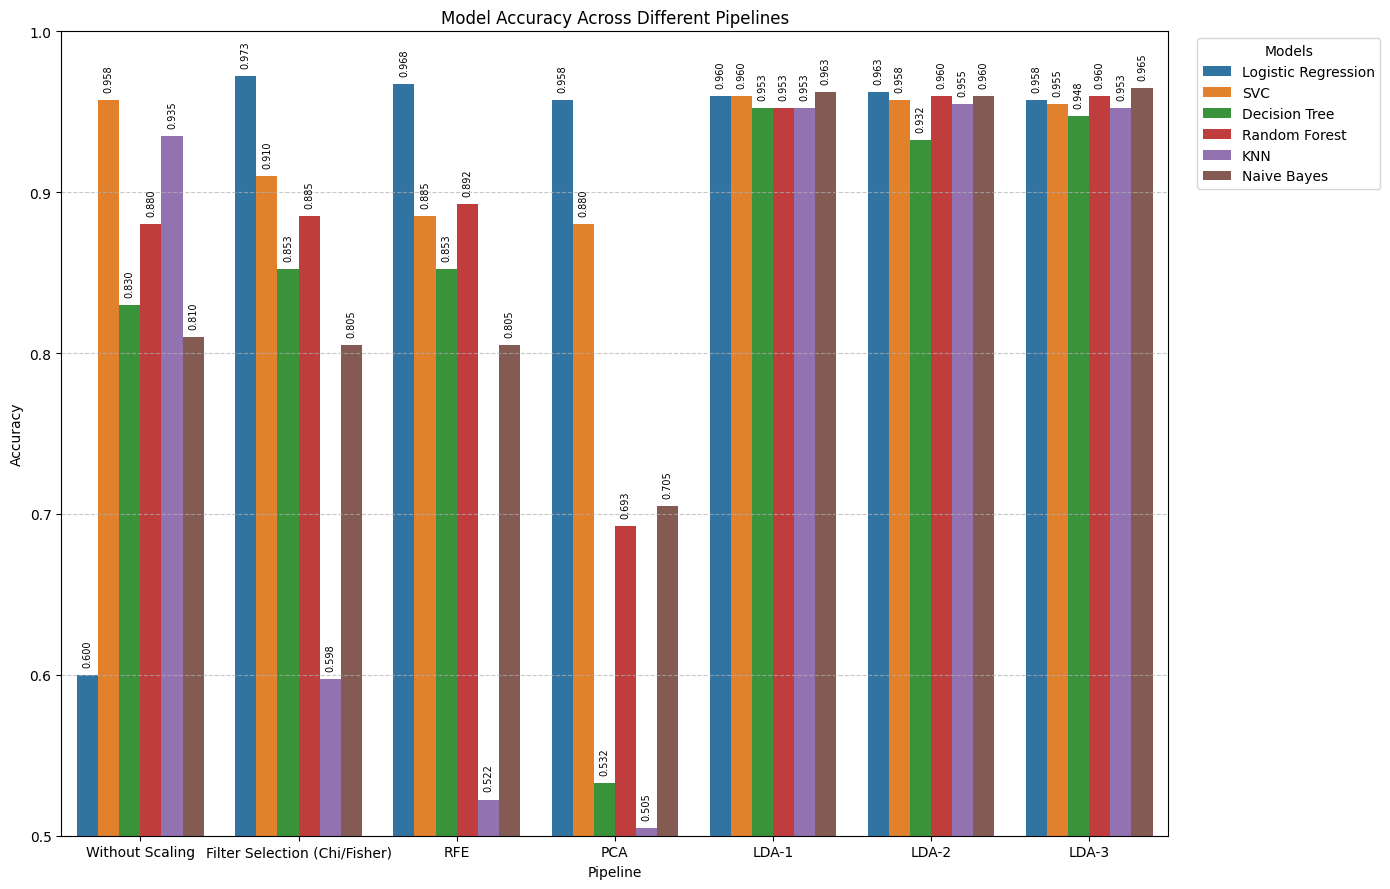

In [ ]:
# Melt the DataFrame to have 'Pipeline' on the x-axis and 'Model' as hue
df_plot_melted = df_acc.reset_index().rename(columns={'index': 'Model'}).melt(
    id_vars='Model', var_name='Pipeline', value_name='Accuracy'
)

plt.figure(figsize=(14, 9))
sns.barplot(x='Pipeline', y='Accuracy', hue='Model', data=df_plot_melted, palette='tab10')

plt.title('Model Accuracy Across Different Pipelines')
plt.xlabel('Pipeline')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)

# Add accuracy values on top of the bars
for container in plt.gca().containers:
    for patch in container.patches:
        if patch.get_height() > 0.01:
            plt.text(patch.get_x() + patch.get_width() / 2.,
                     patch.get_height() + 0.005,
                     f'{patch.get_height():.3f}', ha='center', va='bottom', fontsize=7, rotation=90)

plt.legend(title='Models', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Models total time Comparision

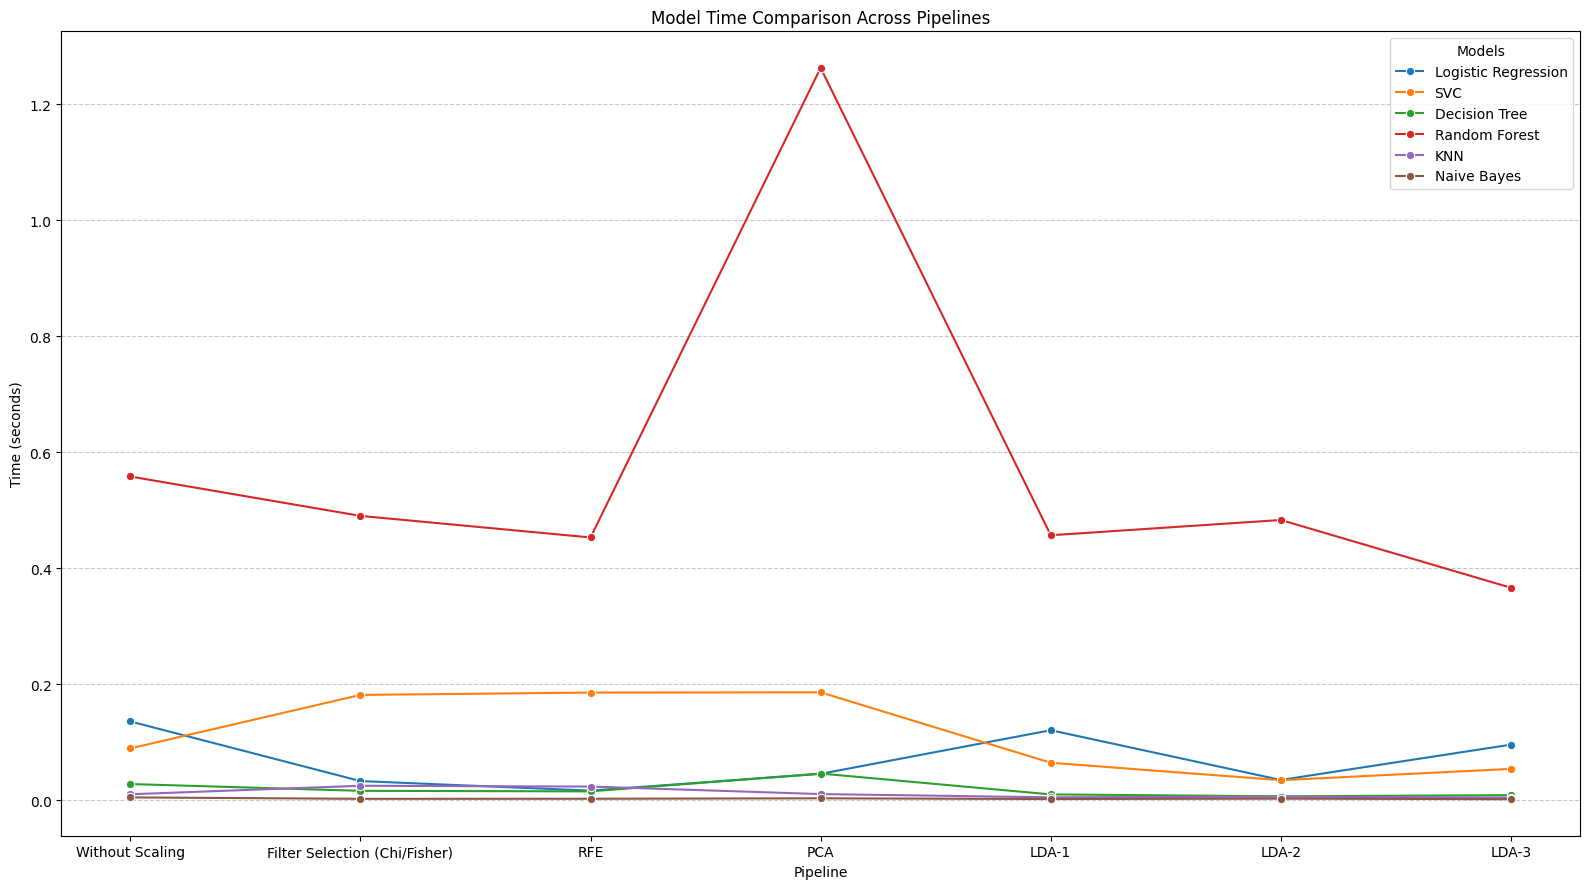

In [ ]:
time_data = {
    "Without Scaling": time_scores_without_scale,
    "Filter Selection (Chi/Fisher)": time_scores_reduced,
    "RFE": time_scores_rfe,
    "PCA": time_scores_pca,
    "LDA-1": lda1_time,
    "LDA-2": lda2_time,
    "LDA-3": lda3_time
}

df_time = pd.DataFrame(time_data)

# Melt the DataFrame to have 'Pipeline' on the x-axis and 'Model' as hue
df_plot_melted_time = df_time.reset_index().rename(columns={'index': 'Model'}).melt(
    id_vars='Model', var_name='Pipeline', value_name='Time'
)

plt.figure(figsize=(16, 9))
sns.lineplot(x='Pipeline', y='Time', hue='Model', data=df_plot_melted_time, marker='o')

plt.title('Model Time Comparison Across Pipelines') # Main title on top
plt.xlabel('Pipeline') # X-axis label
plt.ylabel('Time (seconds)') # Y-axis label

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title='Models', loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
print(df_time)

                     Without Scaling  Filter Selection (Chi/Fisher)       RFE  \
Logistic Regression         0.135869                       0.033086  0.016587   
SVC                         0.089386                       0.181580  0.185620   
Decision Tree               0.027949                       0.016246  0.015299   
Random Forest               0.558151                       0.490235  0.453049   
KNN                         0.010329                       0.024963  0.023586   
Naive Bayes                 0.004896                       0.002473  0.002598   

                          PCA     LDA-1     LDA-2     LDA-3  
Logistic Regression  0.045500  0.120764  0.034960  0.095860  
SVC                  0.186021  0.064667  0.034573  0.054069  
Decision Tree        0.046020  0.010066  0.006805  0.008794  
Random Forest        1.262575  0.456853  0.483169  0.366344  
KNN                  0.010636  0.005035  0.006149  0.004564  
Naive Bayes          0.003341  0.002120  0.002765  0.001882 

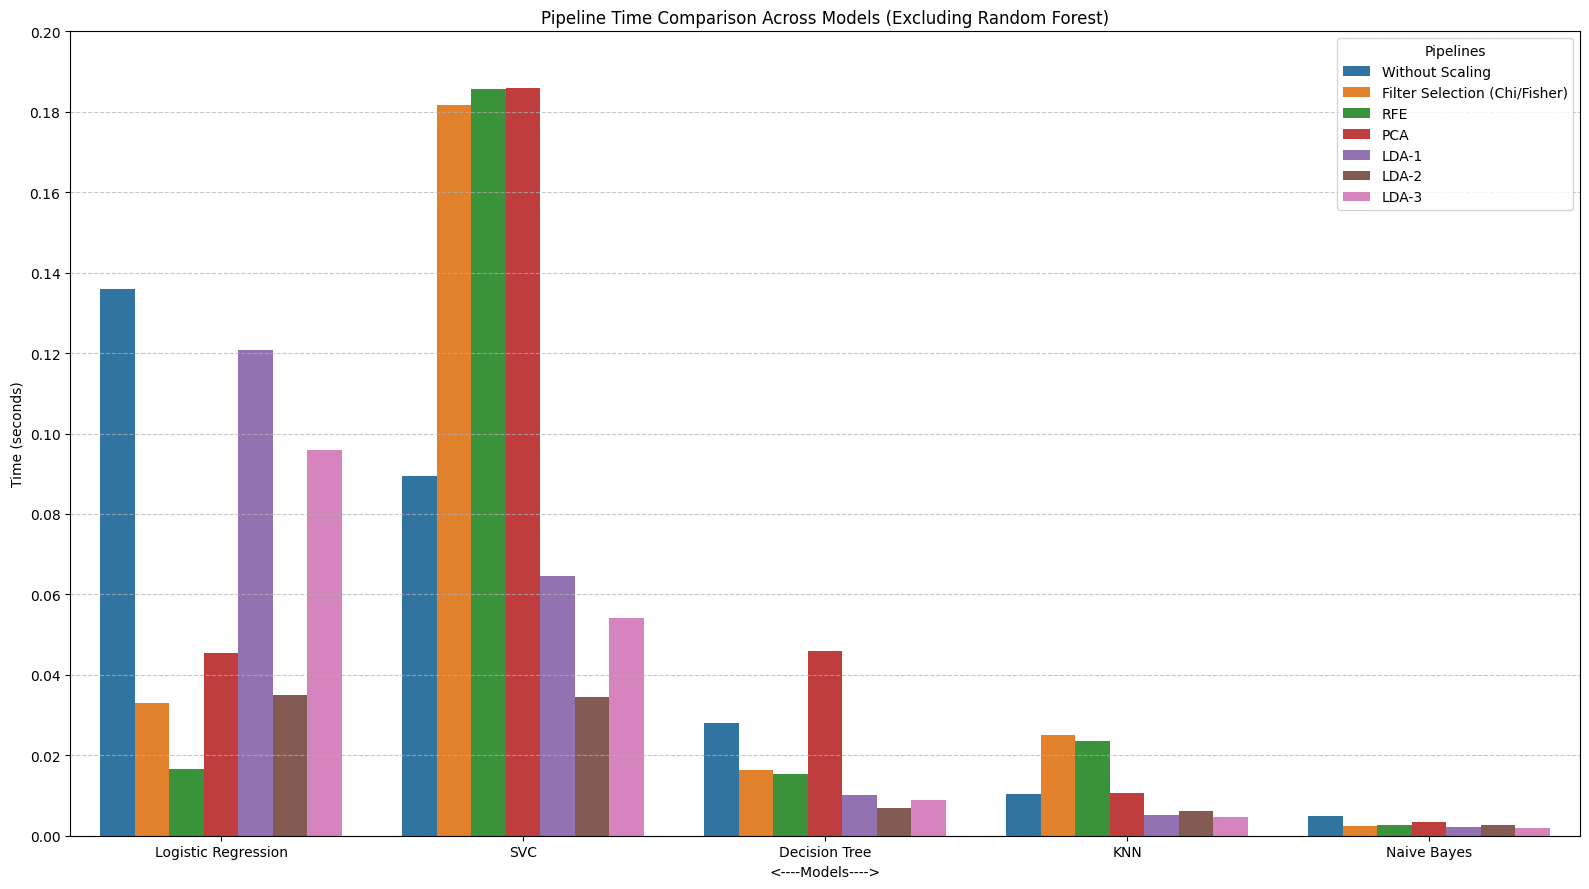

In [ ]:
# Ensure df_time is available (re-create if necessary based on your kernel state)
time_data = {
    "Without Scaling": time_scores_without_scale,
    "Filter Selection (Chi/Fisher)": time_scores_reduced,
    "RFE": time_scores_rfe,
    "PCA": time_scores_pca,
    "LDA-1": lda1_time,
    "LDA-2": lda2_time,
    "LDA-3": lda3_time
}

df_time = pd.DataFrame(time_data)

# Melt the DataFrame to have 'Model' on the x-axis and 'Pipeline' as hue
df_plot_melted_time_reversed = df_time.reset_index().rename(columns={'index': 'Model'}).melt(
    id_vars='Model', var_name='Pipeline', value_name='Time'
)

# Filter out 'Random Forest' as requested
df_filtered_time = df_plot_melted_time_reversed[df_plot_melted_time_reversed['Model'] != 'Random Forest']

plt.figure(figsize=(16, 9))
sns.barplot(x='Model', y='Time', hue='Pipeline', data=df_filtered_time, palette='tab10')

plt.title('Pipeline Time Comparison Across Models (Excluding Random Forest)')
plt.xlabel('<----Models---->')
plt.ylabel('Time (seconds)')

plt.ylim(0.0, 0.2) # Set y-axis from 0.0 to 0.2
plt.yticks(np.arange(0.0, 0.21, 0.02))

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title='Pipelines', loc='upper right')
plt.tight_layout()
plt.show()

### Cross-Validation for LDA1

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVC": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_means = {}
accuracy_stds = {}

print("\n--- Performing Stratified K-Fold Cross-Validation ---")
for name, model in models.items():
    scores = cross_val_score(model, X_train_lda1, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    accuracy_means[name] = scores.mean()
    accuracy_stds[name] = scores.std()

    print(f"{name}: Mean Accuracy = {accuracy_means[name]:.4f}, Std Dev = {accuracy_stds[name]:.4f}")


--- Performing Stratified K-Fold Cross-Validation ---
Logistic Regression: Mean Accuracy = 0.9531, Std Dev = 0.0084
SVC: Mean Accuracy = 0.9519, Std Dev = 0.0098
Decision Tree: Mean Accuracy = 0.9331, Std Dev = 0.0051
Random Forest: Mean Accuracy = 0.9331, Std Dev = 0.0051
KNN: Mean Accuracy = 0.9456, Std Dev = 0.0090
Naive Bayes: Mean Accuracy = 0.9500, Std Dev = 0.0120


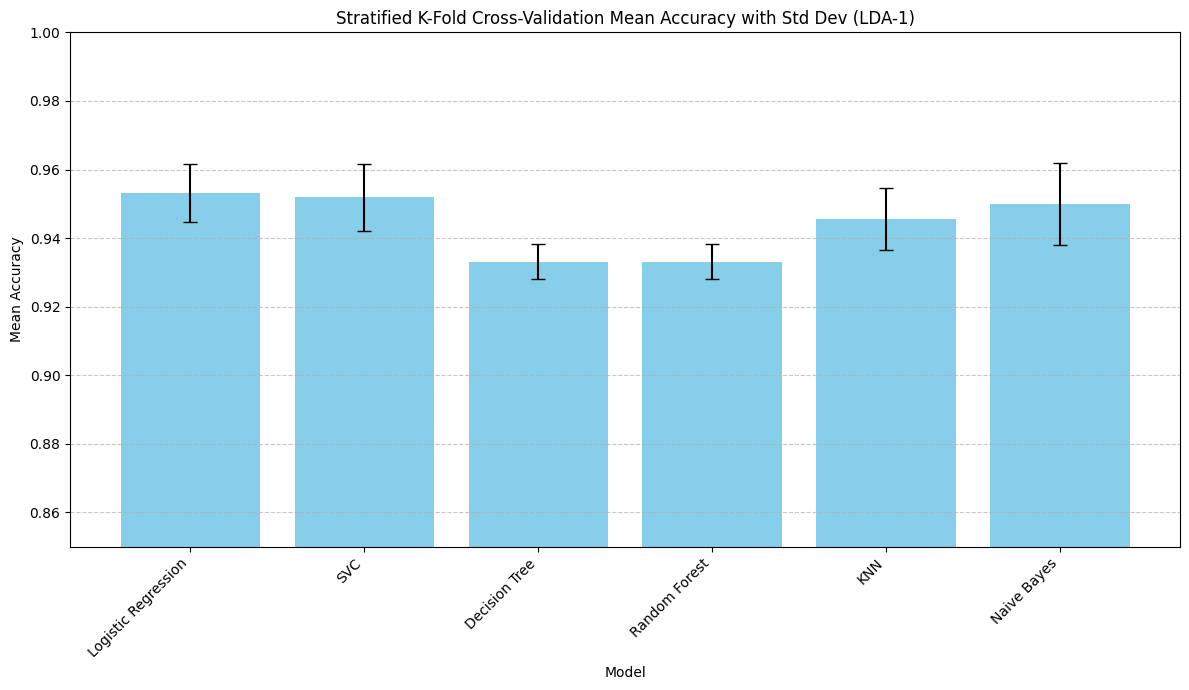

Cross-validation results visualized.


In [ ]:
cv_results_df = pd.DataFrame({
    'Mean Accuracy': accuracy_means,
    'Standard Deviation': accuracy_stds
})

plt.figure(figsize=(12, 7))
plt.bar(cv_results_df.index, cv_results_df['Mean Accuracy'], yerr=cv_results_df['Standard Deviation'], capsize=5, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Accuracy')
plt.title('Stratified K-Fold Cross-Validation Mean Accuracy with Std Dev (LDA-1)')
plt.ylim(0.85, 1.0) # Adjust y-axis limit for better visualization of differences
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Cross-validation results visualized.")

## More Experiments

### Removing more features effect on model

In [ ]:
all_accuracies_by_removed_features = {}

# Loop from removing 5 to 17 least important features
for num_features_to_remove in range(5, 18):
    # a. Identify the num_features_to_remove least important features
    least_important_features = sorted_p_values_chi.tail(num_features_to_remove).index.tolist()

    # b. Create new training and testing feature sets by dropping these identified features
    X_train_reduced = X_train.drop(columns=least_important_features)
    X_test_reduced = X_test.drop(columns=least_important_features)

    # c. Initialize a StandardScaler and fit it to X_train_reduced, then transform both
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_reduced)
    X_test_scaled = scaler.transform(X_test_reduced)

    # d. Initialize an empty dictionary to store accuracy scores for the current iteration
    current_accuracies = {}

    # e. Loop through each model in the models dictionary
    for name, model in models.items():
        # i. Train the current model
        model.fit(X_train_scaled, y_train)
        # ii. Make predictions
        y_pred = model.predict(X_test_scaled)
        # iii. Calculate the accuracy_score
        accuracy = accuracy_score(y_test, y_pred)
        # iv. Store the accuracy score
        current_accuracies[name] = accuracy

    # f. Store current_accuracies in the all_accuracies_by_removed_features dictionary
    all_accuracies_by_removed_features[num_features_to_remove] = current_accuracies

print("Accuracy scores for models after removing varying number of features:")
for num, accuracies in all_accuracies_by_removed_features.items():
    print(f"\n--- Removed {num} Features ---")
    for model_name, acc in accuracies.items():
        print(f"{model_name}: {acc:.4f}")

Accuracy scores for models after removing varying number of features:

--- Removed 5 Features ---
Logistic Regression: 0.9725
SVC: 0.9100
Decision Tree: 0.8525
Random Forest: 0.8850
KNN: 0.5975
Naive Bayes: 0.8050

--- Removed 6 Features ---
Logistic Regression: 0.9725
SVC: 0.9050
Decision Tree: 0.8400
Random Forest: 0.9000
KNN: 0.6250
Naive Bayes: 0.8100

--- Removed 7 Features ---
Logistic Regression: 0.9725
SVC: 0.9025
Decision Tree: 0.8500
Random Forest: 0.8900
KNN: 0.5525
Naive Bayes: 0.8100

--- Removed 8 Features ---
Logistic Regression: 0.9800
SVC: 0.9175
Decision Tree: 0.8525
Random Forest: 0.9050
KNN: 0.6375
Naive Bayes: 0.8075

--- Removed 9 Features ---
Logistic Regression: 0.9775
SVC: 0.9200
Decision Tree: 0.8525
Random Forest: 0.9200
KNN: 0.6525
Naive Bayes: 0.8050

--- Removed 10 Features ---
Logistic Regression: 0.9775
SVC: 0.9150
Decision Tree: 0.8425
Random Forest: 0.9150
KNN: 0.6675
Naive Bayes: 0.8050

--- Removed 11 Features ---
Logistic Regression: 0.9750
SVC: 0.9

In [ ]:
df_feature_removal_accuracies = pd.DataFrame(all_accuracies_by_removed_features).T
df_feature_removal_accuracies.index.name = 'Number of Features Removed'
display(df_feature_removal_accuracies)

,Logistic Regression,SVC,Decision Tree,Random Forest,KNN,Naive Bayes
Number of Features Removed,,,,,,
5,0.9725,0.9100,0.8525,0.885,0.5975,0.8050
6,0.9725,0.9050,0.8400,0.900,0.6250,0.8100
7,0.9725,0.9025,0.8500,0.890,0.5525,0.8100
8,0.9800,0.9175,0.8525,0.905,0.6375,0.8075
9,0.9775,0.9200,0.8525,0.920,0.6525,0.8050
10,0.9775,0.9150,0.8425,0.915,0.6675,0.8050
11,0.9750,0.9125,0.8675,0.915,0.6975,0.7975
12,0.9800,0.9025,0.8725,0.920,0.7225,0.7975
13,0.9850,0.9225,0.8650,0.930,0.7550,0.8000


#### Cross-validation on Logistic Regression after removing 14 features and Confusion Matrix

Shape of X_train after removing 14 features: (1600, 6)
Shape of X_test after removing 14 features: (400, 6)

Logistic Regression (14 features removed) - Cross-Validation Results:
Mean Accuracy = 0.9662
Standard Deviation = 0.0091


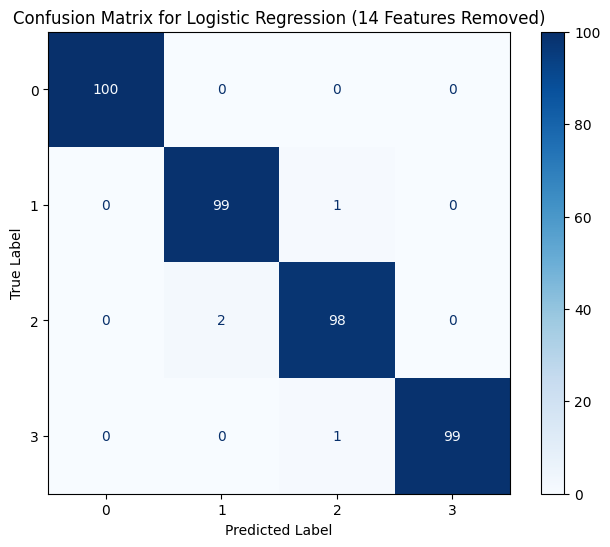

In [ ]:
# Identify the 14 least important features based on sorted_p_values_chi
least_14_features = sorted_p_values_chi.tail(14).index.tolist()

# Create new training and testing feature sets by dropping these identified features
X_train_14_features = X_train.drop(columns=least_14_features)
X_test_14_features = X_test.drop(columns=least_14_features)

# Scale the reduced data
scaler_14 = StandardScaler()
X_train_scaled_14_features = scaler_14.fit_transform(X_train_14_features)
X_test_scaled_14_features = scaler_14.transform(X_test_14_features)

print(f"Shape of X_train after removing 14 features: {X_train_scaled_14_features.shape}")
print(f"Shape of X_test after removing 14 features: {X_test_scaled_14_features.shape}")

# Initialize Logistic Regression model
lr_model_14_features = LogisticRegression(random_state=42)

# Perform Stratified K-Fold Cross-Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv_14 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_14 = cross_val_score(lr_model_14_features, X_train_scaled_14_features, y_train, cv=cv_14, scoring='accuracy', n_jobs=-1)

print(f"\nLogistic Regression (14 features removed) - Cross-Validation Results:")
print(f"Mean Accuracy = {scores_14.mean():.4f}")
print(f"Standard Deviation = {scores_14.std():.4f}")

# Train the model on the full scaled training data to generate a confusion matrix on the test set
lr_model_14_features.fit(X_train_scaled_14_features, y_train)
y_pred_14_features = lr_model_14_features.predict(X_test_scaled_14_features)

# Display Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_14_features)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model_14_features.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Logistic Regression (14 Features Removed)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Display precision, recall, etc.. complete
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_14_features))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.98      0.99      0.99       100
           2       0.98      0.98      0.98       100
           3       1.00      0.99      0.99       100

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



### Predict Price Range with Random Forest (LDA-3 Pipeline)

In [ ]:
print("Original features expected by the model:")
display(X.columns)

rf_model_lda3 = LogisticRegression(random_state=42)
rf_model_lda3.fit(X_train_lda3, y_train)

new_mobile_features = {
    'battery_power': 1500,
    'blue': 1,
    'clock_speed': 1.5,
    'dual_sim': 0,
    'fc': 5,
    'four_g': 1,
    'int_memory': 32,
    'm_dep': 0.8,
    'mobile_wt': 120,
    'n_cores': 4,
    'pc': 10,
    'px_height': 800,
    'px_width': 1200,
    'ram': 3000,
    'sc_h': 12,
    'sc_w': 6,
    'talk_time': 10,
    'three_g': 1,
    'touch_screen': 1,
    'wifi': 1
}

# Convert to DataFrame
new_data_df = pd.DataFrame([new_mobile_features])

# Ensure the new data DataFrame has columns in the same order as X (or X_train)
new_data_df = new_data_df[X.columns]

scaler_for_prediction = StandardScaler()
scaler_for_prediction.fit(X_train)

new_data_scaled = scaler_for_prediction.transform(new_data_df)
new_data_lda3 = lda3.transform(new_data_scaled)

# Predict the price range
predicted_price_range = rf_model_lda3.predict(new_data_lda3)

print(f"\nPredicted Price Range: {predicted_price_range[0]}")

print("\nPrice Range mapping:")
print("0: low cost")
print("1: medium cost")
print("2: high cost")
print("3: very high cost")

Original features expected by the model:


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


Predicted Price Range: 3

Price Range mapping:
0: low cost
1: medium cost
2: high cost
3: very high cost


### Logistic Regression Prediction

In [ ]:
selected_features = ['ram', 'battery_power', 'px_height', 'px_width', 'mobile_wt', 'int_memory']

X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

scaler = StandardScaler()
X_train_scaled_reduced = scaler.fit_transform(X_train_filtered)
X_test_scaled_reduced = scaler.transform(X_test_filtered)

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled_reduced, y_train)

y_pred_lr_reduced = logistic_model.predict(X_test_scaled_reduced)

In [ ]:
selected_features = ['ram', 'battery_power', 'px_height', 'px_width', 'mobile_wt', 'int_memory']

# Mapping for price ranges
price_range_map = {
    0: 'low cost',
    1: 'medium cost',
    2: 'high cost',
    3: 'very high cost'
}

# Static input values for a new mobile
user_input = {
    'ram': 1000,
    'battery_power': 2500,
    'px_height': 1080,
    'px_width': 2392,
    'mobile_wt': 185,
    'int_memory': 128
}

# Convert user input to a DataFrame
new_mobile_df = pd.DataFrame([user_input])
new_mobile_scaled = scaler.transform(new_mobile_df)

# Predict the price range
predicted_price_range_numeric = logistic_model.predict(new_mobile_scaled)[0]
predicted_price_range_category = price_range_map.get(predicted_price_range_numeric, 'Unknown category')

print(f"\nPredicted Price Range (Numeric): {predicted_price_range_numeric}")
print(f"Predicted Price Range (Category): {predicted_price_range_category}")


Predicted Price Range (Numeric): 2
Predicted Price Range (Category): high cost


## Conclusion

- From Correlation Matrix, Fisher Score, Chi-Sqaure and RFE: RAM, Battery power, px_height, px_width

- LDA provides the best balance accuracy (93% to 96%) for all the models.

- Logistic Regression achieves highest accuarcy 99% when only top 6 features are choose based on Chi-Sqaure result.

